# COGS 108 - Final Project 
## Surveillance Cameras: An Effective Deterrent or A Waste of Public Resources?

# Overview

Our project sought to discern any quantifiable effects on the rate of change in violent crime from the installation of surveillance cameras in various neighborhoods of Chicago. This task was accomplished by comparing violent crime rates within neighborhoods with high crime rates before and after their installation. Overall, we found no evidence to suggest that surveillance cameras are effective way to curtail violent crimes.

# Names

- Chaitanya Patel
- Kristine Marie Baluyot
- Linh Le
- Namit Mishra
- Tiffany Zhang
- Robert Eaton

# Group Members IDs

- A15346478 
- A13447798 
- A14201350
- A92112718
- A13161270
- A14190293

# Research Question

### Was there a significant change to the year-on-year crime rate for violent crimes in neighborhoods of Chicago in a three year period before and after activation of the surveillance cameras in 2003?

## Background and Prior Work

Violent crime has become a politically and socially divisive issue in recent years in America. The recent attack on a mosque in New Zealand is also a reminder that the situation is not very different in some other countries as well. Over the past 10 years, many measures have been suggested and implemented for prevention of these types of crimes in various cities throughout America and all over the world. Such measures include surveillance cameras, increased number of police patrols, and new legislation. Over the past quarter century, we have seen that violent crime actually decreasing yearly in the US.[1] However, America still has more violent crimes compared to other democratic nations.[2] Further, with regards to gun crime, we have seen a higher number of deaths by guns in 2018 than in any of the last 50 years.[3] While looking at data on violent crime we discovered that despite a decrease in crime, Chicago still holds the record of having the highest rate of violent crime in the country.[4] We also discovered that 5% of all violent crimes in America, occur in the city of Chicago, which is also the highest in the country.[5] Chicago has a network of over 30,000 cameras and sensors to monitor the city streets. The first set of cameras was installed in the summer of 2003, with full activation later that year.[6] Some have been skeptical about the effectiveness of these cameras while others have praised their usefulness in conducting ensuing investigations.[7] Further, these cameras come with a risk of intrusion and abuse, adding to the already apparent skepticism. 

No significant amount of data-driven analysis is currently available on whether or not these surveillance tools have been effective deterrents to violent crimes. Due to Chicago having a high amount of violent crimes, coupled with the availability of location data for the cameras as well as an extensive database of crimes, we decided to focus our efforts on the city of Chicago to analyze the effectiveness of such cameras in reducing violent crime rate over the years. We will look at the crime rates before and after their installation by calculating crime rates in the periods 2001-03 and 2004-06. We plan to look at the neighborhoods with higher amounts of both crime and cameras, to filter out outlier data. If we can find a noticeable change in the year-on-year crime rate between the two time periods, we will be inclined to say that the cameras may have had some effect.

References (include links):

- 1) [Source:https://www.pewresearch.org/fact-tank/2019/01/03/5-facts-about-crime-in-the-u-s/]
- 2) [Source:https://prospect.org/article/violent-crime-increasing]
- 3) [Source:https://www.nytimes.com/2018/12/18/us/gun-deaths.html]
- 4) [Source:https://www.nbcnews.com/news/us-news/chicago-sees-decline-murders-other-violent-crimes-second-straight-year-n95345]
- 5) [Source:https://www.kaggle.com/jameslko/gun-violence-data]
- 6) [Source:https://home.chicagopolice.org/inside-the-cpd/pod-program/]
- 7) [Source:https://www.nytimes.com/2018/05/26/us/chicago-police-surveillance.html]

Prior work:

- 1) A previous class project analysing the relation between crime and quality of businesses in the vicinity. https://github.com/COGS108/FinalProjects-Sp17/blob/master/006-FinalProject.ipynb

# Hypothesis


Research so far has not definitively linked lower crime rates with the installation of cameras. Other studies have shown them to simply push crime to other, less visible areas.[1] Thus, we do not expect to see any noticeable change in overall trends for violent crimes.

References (include links):

- 1) [Source:https://www.aclu.org/blog/privacy-technology/surveillance-technologies/police-chief-surveillance-cameras-dont-help-fight]


# Dataset(s)

#### First dataset
- Dataset Name: Crimes - 2001 to present
- Link to the dataset: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
- Number of observations: 6.8 million
- Actual number of observations used: 170,000


This dataset from the City of Chicago contains all crime data from 2001 to the present. 
It contains a wealth of information, and many columns not very necessary to our analysis. 
We focused on the following columns:
- Date - to sort it into the 2001-03 block or the 2004-06 block, and ignored the rest.
- IUCR - crime code, keeping only violent crimes as defined in Illinois 
- Primary Type - to sort crimes more specifically
- Location description - stating what time of place the crime occurred (such as inside or on the street)
- Latitude, Longitude, Location - pinpoints the location of the crime. The ‘Location’ column is simply the Latitude and Longitude pair


#### Second dataset
- Dataset Name: Blue Light Cameras in the city of Chicago
- Link to the dataset: https://redshiftzero.github.io/policesurveillance/
- Number of observations: 715 camera locations

This dataset contains over 700 camera locations which were installed by the City of Chicago under their POD camera program. The data was obtained by the Lucy Parsons Labs organization through various Freedom of Information Act requests. The camera locations were indicated on a map. Therefore, the data we needed, that is the latitude and logitude of camera locations was embedded in HTML code with Javascript. We used Beautiful Soup along with python regular expressions to extract the data from source code of the link above. The script for extracting the data is as below. The latitude and logitude were saved in a csv file named 'lat_long.csv'. 

In [62]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
import re
import csv
import matplotlib 

cameras = 'https://redshiftzero.github.io/policesurveillance/pod.html'
data = requests.get(cameras)
soup = BeautifulSoup(data.content, 'html.parser')

right_table = soup.find_all('script')
what_we_need = right_table[6]

# Regular expression to find patterns of data we need
pattern = re.compile(".*var marker_.* = L.marker\(\[.*\n.*\n")
all_patterns = pattern.findall(what_we_need.string)

# Using string functions to convert data to needed form
with open('lat_long.csv', mode='w') as camera_file:
    camera_file = csv.writer(camera_file, delimiter=',', \
                  lineterminator = '\n', quotechar='"',\
                  quoting=csv.QUOTE_MINIMAL)
    camera_file.writerow(["Latitude", "Longitude"])
    for each in all_patterns:
        each = each.strip()
        each = ' '.join(each.split())
        each = each[each.find('[') + 1:each.find(']')]
        (lat, long) = each.split(',')
        lat = lat.strip()
        long = long.strip()
        camera_file.writerow([lat, long])

# Setup

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import pandas as pd

from bs4 import BeautifulSoup
import requests
import gps_to_neighborhood

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

#### Importing both the datasets into pandas dataframes. 

In [2]:
df = pd.read_csv('Crimes_-_2001_to_present.csv')
df_camera = pd.read_csv('lat_long.csv')

# Data Cleaning

Because the camera dataset was extracted by us, we already cleaned it to the required standards. 
#### Below are the dataset to clean the Chicago crime dataset. 

First, let us keep only the necessary columns: ID, Date, Block, IUCR, Description, Location Description, Arrest, Latitude, Longitude, and Location. Let us also drop any datapoint will NaN value for the location as the analysis is dependent on knowing the neighborhood where the crime occured.

In [3]:
df.drop(['Block','Case Number','Community Area','Domestic',
         'Beat','District','Ward','FBI Code','X Coordinate',
         'Y Coordinate','Year','Updated On',
         'Historical Wards 2003-2015', 'Zip Codes',
         'Census Tracts','Boundaries - ZIP Codes', 'Location',
         'Wards','Police Districts','Police Beats'], axis=1, 
        inplace=True)
df.dropna(subset=['Latitude', 'Longitude'], axis='rows', inplace=True)
df.head()

,ID,Date,IUCR,Primary Type,Description,Location Description,Arrest,Latitude,Longitude,Community Areas
561,24560,05/26/2019 06:48:00 AM,0110,HOMICIDE,FIRST DEGREE MURDER,CHA PARKING LOT,False,41.864278,-87.659660,29.0
680,24559,05/26/2019 02:11:00 AM,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,41.864278,-87.659682,29.0
794,24558,05/25/2019 11:43:00 PM,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,41.754424,-87.634786,67.0
1000,24557,05/25/2019 07:01:00 PM,0110,HOMICIDE,FIRST DEGREE MURDER,GANGWAY,False,41.695280,-87.626419,45.0
2312,24556,05/24/2019 02:12:00 AM,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,41.783199,-87.657851,65.0


Following are the total type of crimes in our dataset.

In [4]:
df["Primary Type"].unique()

array(['HOMICIDE', 'OTHER OFFENSE', 'ROBBERY', 'THEFT', 'NARCOTICS',
       'BATTERY', 'ASSAULT', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'PUBLIC PEACE VIOLATION', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'WEAPONS VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'BURGLARY',
       'CRIM SEXUAL ASSAULT', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC INDECENCY', 'SEX OFFENSE', 'KIDNAPPING', 'PROSTITUTION',
       'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING',
       'OTHER NARCOTIC VIOLATION', 'STALKING', 'OBSCENITY',
       'HUMAN TRAFFICKING', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL', 'RITUALISM',
       'DOMESTIC VIOLENCE'], dtype=object)

As evidenced, there are multiple types of crimes. However, only certain ones are deemed 'violent' under Illinois and federal laws. The next step is to remove rows with non-violent crimes. The source for the definition of violent crimes is http://gis.chicagopolice.org/CLEARMap_crime_sums/crime_types.html.

In [5]:
crimes = df[(df["Primary Type"] == 'BATTERY') & (df["IUCR"] != "0440") & 
            (df["IUCR"] != "0486") & (df["IUCR"] != "0460") & 
            (df["IUCR"] != '0484') & (df['IUCR'] != '0454') & 
            (df['IUCR'] != '0487') & (df['IUCR'] != '0475')|
            (df["Primary Type"] == 'ROBBERY') | 
            (df["Primary Type"] == 'ASSAULT') & (df["IUCR"] != '0560') & 
            (df['IUCR'] != '0554') & (df['IUCR'] != '0545')|
            (df["Primary Type"] == 'CRIM SEXUAL ASSAULT') | 
            (df["Primary Type"] == 'HOMICIDE') | 
            (df["IUCR"] =="1753") | (df["IUCR"] == "1754") | 
            (df['IUCR']=="0510") | 
            (df["Primary Type"] == "RITUALISM") & 
            (df["IUCR"] != "0494")]

Next, since such cameras are only in public locations, it would make sense to remove crimes which occur inside. Obviously, there is some discretion with what place categories are selected. Since the CPD cameras in the dataset are only on streets (not inside housing, restaurants, or in transit stations), crimes which did not explicitly occur in a public location were removed. Looking at the different types of locations:

In [6]:
pd.options.mode.chained_assignment = None
crimes.dropna(subset=['Location Description'], inplace=True)
crimes = crimes[(crimes["Location Description"] == "PARKING LOT/GARAGE(NON.RESID.)") | 
                (crimes["Location Description"] == "STREET" )| 
                (crimes["Location Description"] == "ALLEY") |
                (crimes["Location Description"] == "SIDEWALK")|
                (crimes["Location Description"] == "RESIDENCE PORCH/HALLWAY")|
                (crimes["Location Description"] == "CHA PARKING LOT/GROUNDS")|
                (crimes["Location Description"] == "GAS STATION")|
                (crimes["Location Description"] == "POLICE FACILITY/VEH PARKING LOT")|
                (crimes["Location Description"] == "VACANT LOT/LAND")|
                (crimes["Location Description"] == "PARK PROPERTY")|
                (crimes["Location Description"] == "CTA GARAGE / OTHER PROPERTY")|
                (crimes["Location Description"] == "DRIVEWAY - RESIDENTIAL") |
                (crimes["Location Description"] == "PARKING LOT") | 
                (crimes["Location Description"] == "PORCH")|
                (crimes["Location Description"] == "YARD")| 
                (crimes["Location Description"] == "RESIDENTIAL YARD (FRONT/BACK)") |
                (crimes["Location Description"] == "HIGHWAY/EXPRESSWAY")|
                (crimes["Location Description"] == "CHA PARKING LOT") |
                (crimes["Location Description"] == "BRIDGE")|
                (crimes["Location Description"] == "YARD")|
                (crimes["Location Description"] == "LAKEFRONT/WATERFRONT/RIVERBANK")|
                (crimes["Location Description"] == "DRIVEWAY")]
crimes.shape

(394473, 10)

Next, let us look at the Date column. Out analysis requires a comparison between 2001-2003 crime and 2004-2006 crime. Hence, we separate the crime data of the two time periods. 

In [7]:
crimesBefore = crimes[(crimes["Date"].str[6:10] == '2001') | 
                      (crimes["Date"].str[6:10] == '2002') | 
                      (crimes["Date"].str[6:10] == '2003')]
crimesAfter = crimes[(crimes["Date"].str[6:10] == '2004') | 
                     (crimes["Date"].str[6:10] == '2005') | 
                     (crimes["Date"].str[6:10] == '2006')]

Because the limits of neighborhoods decided by the Chicago city change every few years, they were not consistent throughout the dataset. So for consistency, we used a script available on GitHub to ascertain the neighborhoods of the crime. Chicago city used the term community areas for different neighborhoods, so from this point on neighborhoods and community area will be used synonimously in this report. Source of the script to find neighborhoods is: https://github.com/jkgiesler/parse-chicago-neighborhoods 

Now, let us update the dataframes to add the neighborhoods of each crime. Starting with the camera dataset, let's add another column indicating community area of each camera. We will do the same for crimesBefore and crimesAfter. There are chunks of code commented out below because this code takes a long time for large datasets, approximately 20 minutes, we saved the resulting dataframes to csv files so we do not have to repeat the process multiple times.

In [8]:
# all_neighborhoods = gps_to_neighborhood.get_all_neighborhoods()
# list_name = []
# list_area = []
# for index, row in df_camera.iterrows():
#     neighborhood = gps_to_neighborhood.find_neighborhood(row['Longitude'],\
#                     row['Latitude'],all_neighborhoods)
#     if neighborhood is not None:
#         list_name.append(neighborhood[0])
#         list_area.append(neighborhood[1])
#     else:
#         list_name.append('None')
#         list_area.append('None')
# df_camera['Community Areas'] = list_name
# df_camera['Area(unit)'] = list_area

# df_camera = df_camera[df_camera['Community Areas'] != 'None']
# df_camera.to_csv('lat_long.csv', index=False, header=True)
 
df_camera = pd.read_csv('lat_long.csv')

Let us do the same for the crimes dataframe. 

In [9]:
# list_name = []
# list_area = []
# for index, row in crimesBefore.iterrows():
#     neighborhood = gps_to_neighborhood.find_neighborhood(row['Longitude'],\
#                     row['Latitude'],all_neighborhoods)
#     if neighborhood is not None:
#         list_name.append(neighborhood[0])
#         list_area.append(neighborhood[1])
#     else:
#         list_name.append('None')
#         list_area.append('None')
# crimesBefore['Community Areas'] = list_name
# crimesBefore['Area(unit)'] = list_area
# crimesBefore = crimesBefore[crimesBefore['Community Areas'] != 'None']

# crimesBefore.to_csv('CrimesBefore.csv', index=False, header=True)
crimesBefore = pd.read_csv('CrimesBefore.csv')
crimesBefore.head()

,ID,Date,IUCR,Primary Type,Description,Location Description,Arrest,Latitude,Longitude,Community Areas,Area(unit)
0,3118562,12/31/2003 11:55:00 PM,0313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,PARKING LOT/GARAGE(NON.RESID.),False,41.757747,-87.624748,Grand Crossing,9.885317e+07
1,3115633,12/31/2003 11:45:00 PM,031A,ROBBERY,ARMED: HANDGUN,ALLEY,False,41.926927,-87.752242,Belmont Cragin,1.090994e+08
2,3115075,12/31/2003 11:45:00 PM,031A,ROBBERY,ARMED: HANDGUN,STREET,False,41.765693,-87.595842,Grand Crossing,9.885317e+07
3,3118958,12/31/2003 10:55:00 PM,033A,ROBBERY,ATTEMPT: ARMED-HANDGUN,STREET,True,41.894642,-87.715067,Humboldt Park,1.250104e+08
4,3113368,12/31/2003 10:40:00 PM,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,False,41.774849,-87.682168,Chicago Lawn,9.827947e+07


Doing the same for crimes that occured in the years 2004-06. 

In [10]:
# list_name = []
# list_area = []
# for index, row in crimesAfter.iterrows():
#     neighborhood = gps_to_neighborhood.find_neighborhood(row['Longitude'],/
#                    row['Latitude'],all_neighborhoods)
#     if neighborhood is not None:
#         list_name.append(neighborhood[0])
#         list_area.append(neighborhood[1])
#     else:
#         list_name.append('None')
#         list_area.append('None')
# crimesAfter['Community Areas'] = list_name
# crimesAfter['Area(unit)'] = list_area
# crimesAfter = crimesAfter[crimesAfter['Community Areas'] != 'None']

# crimesAfter.to_csv('crimesAfter.csv', index=False, header=True)
crimesAfter = pd.read_csv('CrimesAfter.csv')
crimesAfter.head()

,ID,Date,IUCR,Primary Type,Description,Location Description,Arrest,Latitude,Longitude,Community Areas,Area(unit)
0,5221564,12/31/2006 11:00:00 PM,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,41.903306,-87.763866,Austin,1.700378e+08
1,5218084,12/31/2006 10:55:00 PM,0453,BATTERY,AGGRAVATED PO: OTHER DANG WEAP,SIDEWALK,False,41.892682,-87.708912,Humboldt Park,1.250104e+08
2,5218442,12/31/2006 10:50:00 PM,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,41.875194,-87.731223,Garfield Park,8.997607e+07
3,5217016,12/31/2006 09:17:20 PM,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,ALLEY,False,41.699589,-87.611116,Roseland,1.343137e+08
4,5227622,12/31/2006 08:59:00 PM,0496,BATTERY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,SIDEWALK,True,41.750707,-87.602741,Chatham,8.232067e+07


Now, let us group the crime data by neighborhoods. This way we will be able to analyse the effectiveness of cameras by neighborhoods. 

In [11]:
# Grouping by community areas before and after the cameras were installed.
sumCrimesBefore = crimesBefore['Community Areas'].value_counts().\
rename_axis('Community Areas').reset_index(name='2001-03')
sumCrimesAfter = crimesAfter['Community Areas'].value_counts().\
rename_axis('Community Areas').reset_index(name='2004-06')

# We will use left merge to create a singular dataframe with columns 
# community areas, crimes in 2001-03, crimes in 2004-06 and the difference between the two. 
totalCrimes = sumCrimesBefore.merge(sumCrimesAfter, how = 'left')
totalCrimes['Difference'] = totalCrimes['2004-06'] - totalCrimes['2001-03']

totalCrimes.head()

,Community Areas,2001-03,2004-06,Difference
0,Englewood,6528,5644,-884
1,Austin,5379,4891,-488
2,Humboldt Park,3955,3044,-911
3,Garfield Park,3754,3385,-369
4,South Shore,2866,2691,-175


Lastly, let's do the same wrangling for the camera dataset. We will avoid analysing neighborhoods with less than 10 cameras. Reason being, less than 10 datapoints will not give us a clear idea. The number 10 was decided by manually trying different numbers are observing the bias.

In [12]:
above_10 = df_camera.groupby('Community Areas').filter(lambda x : len(x)>9)
df_camera_above_10 = above_10['Community Areas'].value_counts().\
rename_axis('Community Areas').reset_index(name='Counts')
df_camera_above_10.head()

,Community Areas,Counts
0,Austin,66
1,Humboldt Park,45
2,Englewood,39
3,Garfield Park,35
4,Lower West Side,29


# Data Analysis & Results

To analyse the effects of the surveillance cameras, we first need to analyse how they were installed. Let us plot the crimes before the cameras were installed along with the location of the cameras. This will give a rich visualization and understanding of how the cameras were installed.

Text(0.5, 1.0, 'Crimes in 2001-03 mapped along with the location of cameras')

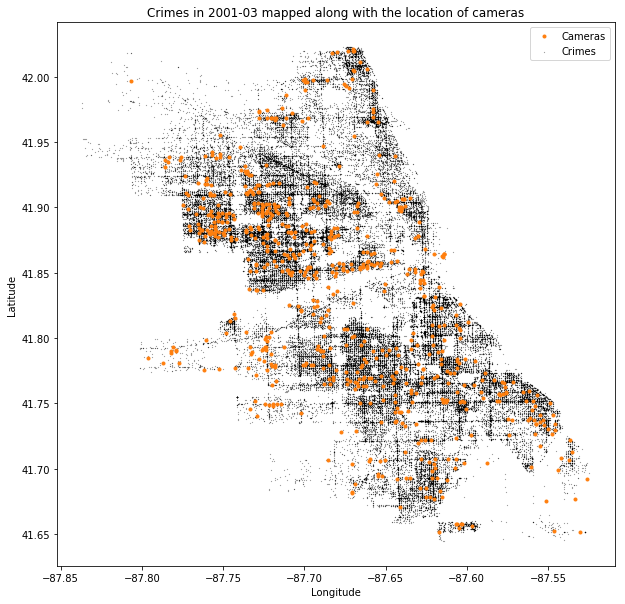

In [13]:
#location = list(zip(crimesBefore['Latitude'], crimesBefore['Longitude']))
plt.figure(figsize=(10, 10))
plt.scatter(crimesBefore['Longitude'], crimesBefore['Latitude'], \
            s=0.02, color = 'k', label='Crimes')
plt.plot(df_camera['Longitude'], df_camera['Latitude'], '.',\
         color='C1', label='Cameras')
pylab.legend(loc='upper right')
axes = plt.gca()
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
pylab.title('Crimes in 2001-03 mapped along with the location of cameras')

From a cursory look, cameras were already installed in community areas where the crimes were maximum. We still need to prove this mathematically. Now let us create a dataset to see the relation between crimes in years 2001-03 in each community area, and cameras per square area installed in 2003. 

Text(0.5, 1.0, 'Distribution of datapoints')

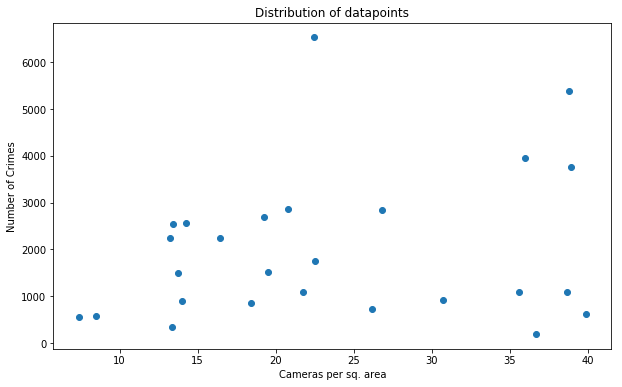

In [14]:
buffer = crimesBefore.groupby('Community Areas').filter(lambda x : len(x)>0)
crimesBefore_by_community = buffer['Community Areas'].value_counts().\
                            rename_axis('Community Areas').\
                            reset_index(name='CrimesCount')
cameraCounts = []
areas = []
to_drop = []
for index, row in crimesBefore_by_community.iterrows():
    camCount = df_camera_above_10.loc[df_camera_above_10['Community Areas']\
                                      == row['Community Areas']]['Counts'].values
    if len(camCount) == 1:    
        area = df_camera.loc[df_camera['Community Areas'] == \
                             row['Community Areas']]['Area(unit)'].values
        cameraCounts.append(camCount[0])
        areas.append(area[0])
    else:
        to_drop.append(index)
    
crimesBefore_by_community.drop(crimesBefore_by_community.index[to_drop], inplace=True)
assert(crimesBefore_by_community.shape[0] == len(cameraCounts))
assert(crimesBefore_by_community.shape[0] == len(areas))
crimesBefore_by_community['Area(unit)'] = areas
crimesBefore_by_community['Cameras'] = cameraCounts
crimesBefore_by_community['CamerasPerArea'] = (crimesBefore_by_community['Cameras'] \
                                               /crimesBefore_by_community['Area(unit)']) * 100000000
plt.figure(figsize=(10, 6))
plt.scatter(crimesBefore_by_community['CamerasPerArea'], crimesBefore_by_community['CrimesCount'])
plt.xlabel('Cameras per sq. area')
plt.ylabel('Number of Crimes')
pylab.title('Distribution of datapoints')

Before we can run the linear regression analysis, we will need to take perform logarithmic transformation of the data as it is not linear. 

In [15]:
crimesBefore_by_community['CrimesCount'] = \
np.log10(crimesBefore_by_community['CrimesCount'])

outcome, predictors = patsy.dmatrices('CamerasPerArea ~\
CrimesCount', crimesBefore_by_community)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         CamerasPerArea   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.2360
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.632
Time:                        21:18:31   Log-Likelihood:                -97.145
No. Observations:                  26   AIC:                             198.3
Df Residuals:                      24   BIC:                             200.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.6064     18.126      0.806      

The above regression analysis states that for a increase of 100 crimes in a neighborhood, approximately 3 cameras are added per square area. This proves that the cameras were infact installed in neighborhoods with high rates of violent crime. This analysis will come in handy while trying to explain the results of further analysis on direct relation between cameras per square area and decrease in crime. Please refer to end of this section for further interpretation. 

Now, let us analyse the direct effects of the camera. We have information for each neighborhood about the numbers of crimes that occured, the number of cameras, the square area, and the difference in violent crimes between 2004-06 and 2001-03.
We use this to check if any relation exists between the number of cameras in square area of a neighborhood and the change in crime. We try to find a linear relation between the two variables. 

In [16]:
df_analysis = pd.DataFrame(columns=['Community', 'CamerasPerArea', 'Difference'])

for index, row in df_camera_above_10.iterrows():
    community = row['Community Areas']
    camera_count = row['Counts']
    # Getting area and difference in crimes for each neighborhood with above 10 cameras
    area = df_camera[df_camera['Community Areas'] == \
                     community].iloc[0]['Area(unit)']
    diff = totalCrimes[totalCrimes['Community Areas'] == \
                       community].iloc[0]['Difference']
    df_analysis = df_analysis.append({'Community' : community , \
                                      'CamerasPerArea' : camera_count/(area/10000000), 
                                      'Difference' : diff } , ignore_index=True)
    
df_analysis.head()

,Community,CamerasPerArea,Difference
0,Austin,3.881491,-488
1,Humboldt Park,3.599700,-911
2,Englewood,2.246544,-884
3,Garfield Park,3.889923,-369
4,Lower West Side,3.556069,-295


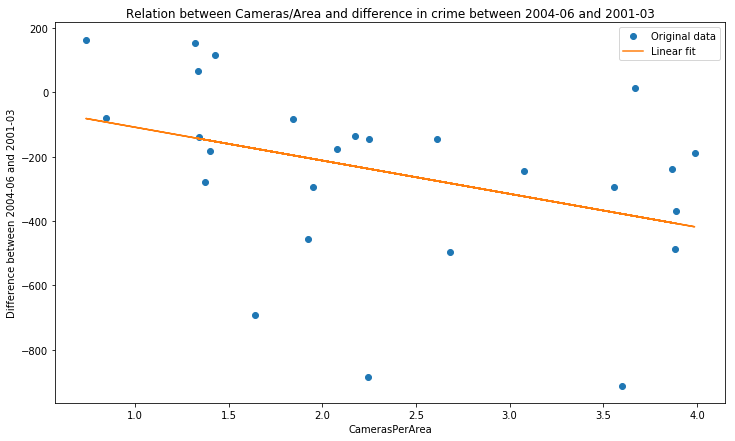

In [17]:
slope, intercept, r_value, p_value, std_err = \
stats.linregress(df_analysis['CamerasPerArea'].tolist(),\
                 df_analysis['Difference'].tolist())

line = slope*(df_analysis['CamerasPerArea'].values) + intercept

plt.figure(figsize=(12, 7))
ax = plt.axes()
plt.xlabel('CamerasPerArea')
plt.ylabel('Difference between 2004-06 and 2001-03')
plt.plot(df_analysis['CamerasPerArea'].tolist(),\
         df_analysis['Difference'].tolist(),'o',\
         label = 'Original data')
plt.plot(df_analysis['CamerasPerArea'].tolist(), \
         line, label = 'Linear fit')
pylab.title('Relation between Cameras/Area and difference in crime between 2004-06 and 2001-03')
pylab.legend(loc='upper right')

The overall trend indicates a decrease in crime when the cameras per square area increases, but it is neither substanial nor conclusive. Because there are a number of outliers in the data. And as we will see below, the decrease in violent crime is no more than the general trend before the cameras were installed. Below is a plot of decrease in crime each year between 2001-10. The orange line is based on the slope of figures prior to the installation of the cameras.  

Text(0.5, 1.0, 'Violent crimes each year from 2001-10')

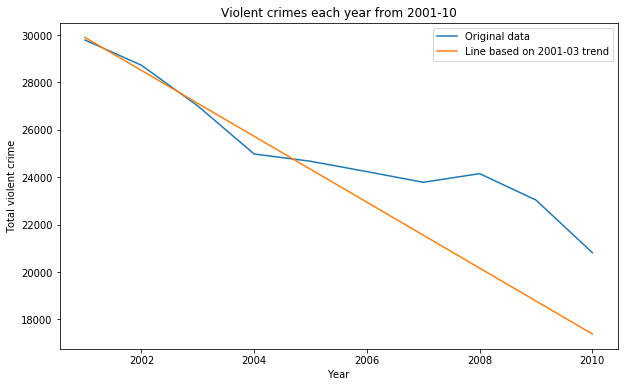

In [18]:
crimesYearwise = []
for i in range(2001,2011):
    crimesYearwise.append(crimes[(crimes["Date"].str[6:10] == str(i))].shape[0])
    
slope, intercept, r_value, p_value, std_err = stats.linregress(range(2001,2004), crimesYearwise[:3])
line = slope*(range(2001,2011)) + intercept
plt.figure(figsize=(10, 6))
plt.plot(range(2001,2011),crimesYearwise,  label = 'Original data')
plt.plot(range(2001,2011), line, label = 'Line based on 2001-03 trend')
pylab.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Total violent crime')
pylab.title('Violent crimes each year from 2001-10')

There is minor decrease in the rate of change between 2002-04. But in subsequent years, the rate of change decreased to a mere minimal, and the rate of decrease between the years 2001-03 did not sustain. In 2010, the figure was much higher than what it should have been if the rate of change prior to installation of camera had sustained. From our earlier analysis on location of the cameras, we can conclude that like installing surveillance cameras, there were other targetted efforts to reduce violent crime that resulted in an overall reduction in violent crime in years 2001-10, but there is no conclusive evidence to prove that the cameras were effective. 

# Ethics & Privacy

The datasets that we are using for this project are available for public use, and there are no restrictions in using them. Our data usage will be split in two. The first part of the analysis is parsing both the locations of the crimes and the cameras using longitude and latitude values. The second part will be cross-referencing the longitudinal and latitudinal coordinates to an existing community area and analyzing the number of violent crimes in that area as well as how many cameras exist in that area. We will focus only on statistically relevant information; this includes the type of crimes that are deemed ‘violent’ according to Illinois law. One consideration is that the parsing of the long/lat lines to determine a community area may reveal specific addresses of its residents. However, as this information is only as detailed as a block within the neighborhood, we have concluded that this will not infringe upon any individual’s privacy. Further, we deemed ZIP codes unnecessary to our analysis, so we dropped them from our dataset. Otherwise, the original dataset otherwise did not contain any personally identifying data.

Besides privacy concerns, we will also take into account biased data collection and reporting. The data collection is highly unlikely to be biased as it was collected by the Chicago Police Department’s CLEAR system which adds data to its database based on police reports. (This itself is based on the assumption that crimes are reported with equal frequency across all areas, which we think is a safe assumption to make in our analysis.) The reporting of our findings may be skewed as we have prior knowledge that the cameras were installed in areas with a higher rate of crime; however, since these cameras were billed as a deterrent to crime, analyzing their effectiveness in the worst areas is still very informative.


# Conclusion & Discussion

For our project, we decided to examine whether installing surveillance cameras had an effect on the rate of change of violent crime in certain neighborhoods in the city of Chicago. We collected two different datasets: crime and camera. The crime data contained all the crime reports in Chicago from 2001 to the present. In this dataset, we focused mainly on the Date, IUCR, Primary Type, Location Description, Latitude, Longitude, Location, and Community Area columns. We selected these columns because we were only interested in the type, location and the date of the crime. The camera dataset contained the various cameras that were installed in Chicago by the Chicago Police Department’s camera program, Police Observation Devices (PODs). For this dataset, we were interested in the location of the cameras. To examine our data, we conducted two types of analysis. We first compared the number of cameras in a community area to the rate of violent crime in that area. We compared this to the unit area of the community area because each community area had a different number of cameras installed. The second analysis that we did was to compare the rates of violent crime before and after the cameras were installed in a specific area. With this analysis, we discovered whether the rate of violent crime increased or decreased as a result of the camera installation.

Through our analysis, **we found that there was no substantial relationship between the rate of violent crimes and the installation of surveillance cameras**. When plotting the data, we found that there were many outliers. Because of this, we could not conclude a definite relationship between the two. One limitation to our project is that we only analyzed the relationship for six years. We also compared the general trend from years 2001-03 with the real data of 2001-10. We found that violent crimes in 2010 was way higher than anticipation based on trend prior to installation of the cameras. 

Further analysis could look at whether there was any noticeable change on the rate for smaller, non-violent crimes which were dropped from our analysis, for completeness. If little change occurred within the small crimes dataset as well, then we could more definitively make a statement as to the usefulness of cameras for reducing crimes as a whole. Another intriguing possibility would be to run an analysis on whether the proliferation of these cameras assisted in increasing the amount of evidence brought in court for these crimes. If having extra cameras meant more crimes were visibly documented and could be more successfully prosecuted, then they may still be useful. Lastly, another stream of thought can be to analyse if installation of cameras pushed more crime into areas with less camera coverage. 

In the meantime, this project could be useful in informing efforts for funding public safety. Evidence from analysis like the one conducted here could inform willing public servants to divert money towards developing more useful methods for violent crime reduction. Further, this analysis would allow neighborhoods with great numbers of surveillance cameras to petition for the removal of this intrusion into their public lives.